## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""

'\nYour code here\n'

In [2]:
import os
import tensorflow.keras as keras

# Try to enable GPU (optional)


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler
def preproc_x(data):
    #original_shape = data.shape
    data = data.reshape((len(data), -1))
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data)
    x = scaler.transform(data)
    #x = data.reshape(original_shape)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

print(x_train.shape)

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

(50000, 32, 32, 3)


/Users/chenxinyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/chenxinyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330   

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 126us/sample - loss: 1.7148 - accuracy: 0.3902 - val_loss: 1.5668 - val_accuracy: 0.4453
Epoch 2/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.4837 - accuracy: 0.4776 - val_loss: 1.4658 - val_accuracy: 0.4892
Epoch 3/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.3657 - accuracy: 0.5202 - val_loss: 1.4051 - val_accuracy: 0.5112
Epoch 4/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.2767 - accuracy: 0.5519 - val_loss: 1.3939 - val_accuracy: 0.5094
Epoch 5/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.1897 - accuracy: 0.5819 - val_loss: 1.3698 - val_accuracy: 0.5175
Epoch 6/100
50000/50000 [==============================] - 7s 132us/sample - loss: 1.1136 - accuracy: 0.6069 - val_loss: 1.3440 - val_accuracy: 0.5341
Epoch 7/100
50000/50000 [===================

50000/50000 [==============================] - 6s 117us/sample - loss: 0.1195 - accuracy: 0.9592 - val_loss: 3.9374 - val_accuracy: 0.5345
Epoch 55/100
50000/50000 [==============================] - 6s 117us/sample - loss: 0.0954 - accuracy: 0.9682 - val_loss: 4.0117 - val_accuracy: 0.5294
Epoch 56/100
50000/50000 [==============================] - 6s 118us/sample - loss: 0.1124 - accuracy: 0.9617 - val_loss: 4.1041 - val_accuracy: 0.5268
Epoch 57/100
50000/50000 [==============================] - 6s 118us/sample - loss: 0.1232 - accuracy: 0.9592 - val_loss: 3.9983 - val_accuracy: 0.5253
Epoch 58/100
50000/50000 [==============================] - 6s 116us/sample - loss: 0.0740 - accuracy: 0.9753 - val_loss: 4.1923 - val_accuracy: 0.5345
Epoch 59/100
50000/50000 [==============================] - 6s 118us/sample - loss: 0.1015 - accuracy: 0.9665 - val_loss: 4.1033 - val_accuracy: 0.5257
Epoch 60/100
50000/50000 [==============================] - 6s 117us/sample - loss: 0.1043 - accuracy

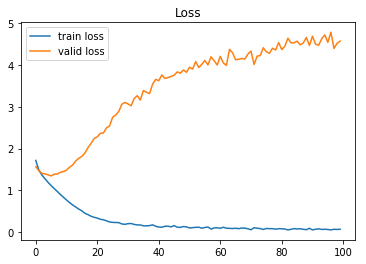

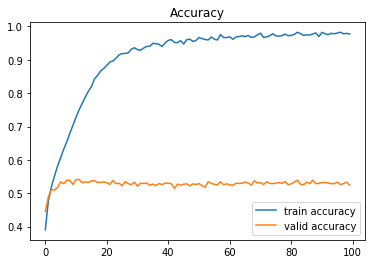

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()